# Representation theory in SageMath
Guest lecture in the Representation theory course at Umeå University 2023-12-19  
Henrik Gustafsson

## Introduction

This presentation is done in JupyterLab with computations done in a SageMath kernel.  

A goal of this guest lecure is to show some parts of what SageMath is capable of when it comes to group theory and representation theory in connection to this course you are taking.

Another goal is to show how studying special functions in representation theory leads to algebraic combinatorics and to tell you how this is related to my research

## Finite groups

In [1]:
D4 = DihedralGroup(4)
D4

Dihedral group of order 8 as a permutation group

In [2]:
a, b = D4.gens()

In [3]:
a^4 == b^2 == D4.identity()

True

In [4]:
C4 = D4.subgroup(a)

In [5]:
D4.character_table()

[ 1  1  1  1  1]
[ 1 -1 -1  1  1]
[ 1 -1  1 -1  1]
[ 1  1 -1 -1  1]
[ 2  0  0  0 -2]

In [6]:
# columns correspond to the following conjugacy classes and 
# rows correspond to different characters
D4.conjugacy_classes_representatives()

[(), (2,4), (1,2)(3,4), (1,2,3,4), (1,3)(2,4)]

In [7]:
gap(D4).CharacterTable().Display()

# Class name (order and distinguishing letter)
# 2nd power
# 3rd power

CT1

     2  3  2  2  2  3

       1a 2a 2b 4a 2c
    2P 1a 1a 1a 2c 1a
    3P 1a 2a 2b 4a 2c

X.1     1  1  1  1  1
X.2     1 -1 -1  1  1
X.3     1 -1  1 -1  1
X.4     1  1 -1 -1  1
X.5     2  .  .  . -2

In [8]:
C4.character_table()

[     1      1      1      1]
[     1     -1      1     -1]
[     1 -zeta4     -1  zeta4]
[     1  zeta4     -1 -zeta4]

In [9]:
zeta(4)

1/90*pi^4

In [10]:
CyclicPermutationGroup(4).character_table()

[     1      1      1      1]
[     1     -1      1     -1]
[     1  zeta4     -1 -zeta4]
[     1 -zeta4     -1  zeta4]

## Lie algebras

In [11]:
# SL(2, Q)
sl2 = lie_algebras.sl(QQ, 2, representation = "matrix")

In [12]:
X, Y, H = sl2.gens()
show("X = ", X)
show("Y = ", Y)
show("H = ", H)

'X = ' [0 1]
[0 0]

'Y = ' [0 0]
[1 0]

'H = ' [ 1  0]
[ 0 -1]

In [13]:
H.bracket(X) == 2 * X and ...
H.bracket(Y) == -2 * Y and ...
X.bracket(Y) == H

True

In [14]:
B = sl2.killing_form

In [15]:
B(X, Y)

4

In [16]:
B(X, H)

0

## Cartan types and root systems 

$ A_n: \mathfrak{sl}_{n+1} \mathbb{C} $  
$ B_n: \mathfrak{so}_{2n+1} \mathbb{C} $  
$ C_n: \mathfrak{sp}_{2n} \mathbb{C} $  
$ D_n: \mathfrak{so}_{2n} \mathbb{C} $

In [17]:
def plot_roots(CT):
    print(DynkinDiagram(CT))
    return RootSystem(CT).ambient_space().plot(roots = "all", 
                                      fundamental_weights=False, 
                                      coroots = False,
                                      alcoves=True,
                                      reflection_hyperplanes = False)

O   O
1   2   
D2


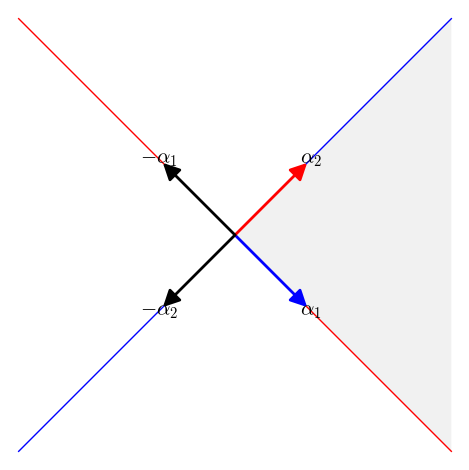

In [18]:
plot_roots("D2") # so4 ~= sl2 + sl2

O=>=O
1   2   
B2


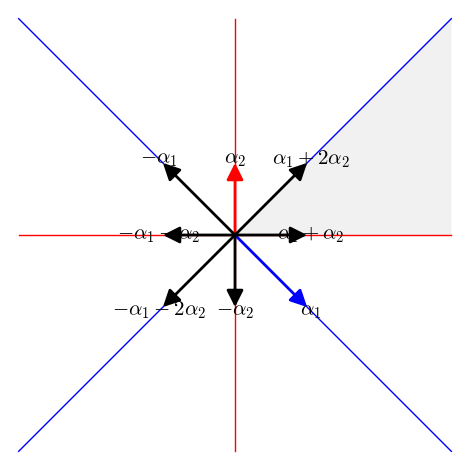

In [19]:
plot_roots("B2") # so5

O---O
1   2   
A2


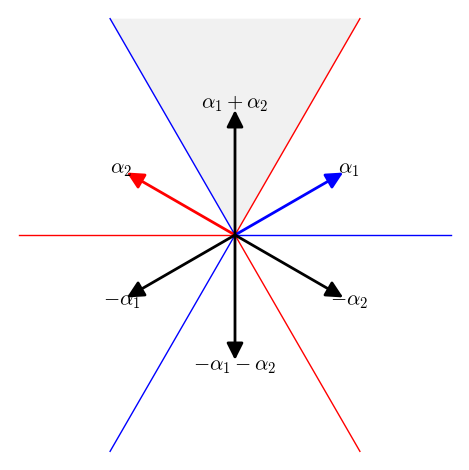

In [20]:
plot_roots("A2") # sl3

  3
O=<=O
1   2   
G2


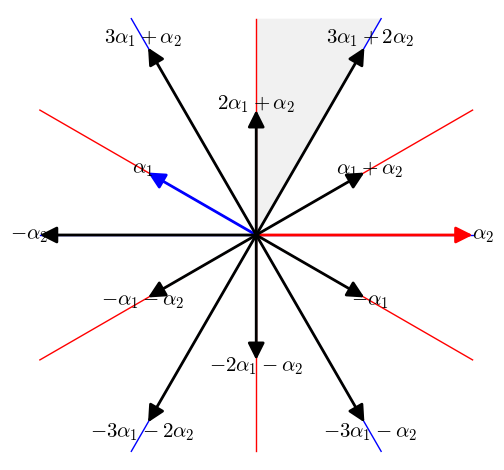

In [21]:
plot_roots("G2") # G2

## Bourbaki's description of the root system

For each Cartan type there is a convenient ambient space $\mathbb{R}^\ell$ which we can embed the corresponding roots into such that the inner product $B^*(\alpha,\beta)$ becomes the standard Euclidean dot product.  
(See Bourbaki, Lie groups ch 4)

In [22]:
V = RootSystem("B3").ambient_space()

In [23]:
DynkinDiagram("B3")

O---O=>=O
1   2   3   
B3

In [24]:
list(V.simple_roots())

[(1, -1, 0), (0, 1, -1), (0, 0, 1)]

In [25]:
V.positive_roots()

[(1, -1, 0),
 (1, 1, 0),
 (1, 0, -1),
 (1, 0, 1),
 (0, 1, -1),
 (0, 1, 1),
 (1, 0, 0),
 (0, 1, 0),
 (0, 0, 1)]

Inner product on the root space $B^*(\alpha, \beta)$

In [26]:
def Bstar(a,b):
    return a.scalar(b)

Dual pairing $n_{\beta\alpha} = \beta(H_\alpha) = \frac{2B^*(\beta,\alpha)}{B^*(\alpha, \alpha)}$

In [27]:
def n(b,a):
    return 2 * Bstar(b,a) / Bstar(a,a)

In [28]:
matrix([[n(b,a) for a in V.simple_roots()] for b in V.simple_roots()])

[ 2 -1  0]
[-1  2 -2]
[ 0 -1  2]

The Cartan matrix gives the same information as the Dynkin diagram

In [29]:
RootSystem("B3").cartan_matrix().inverse()

[  1   1 1/2]
[  1   2   1]
[  1   2 3/2]

## Weyl groups

In [30]:
A3 = RootSystem("A3")
V = A3.ambient_space()
alpha = V.simple_roots()
W = V.weyl_group(prefix = "s")

In [31]:
list(W)

[1,
 s3*s1,
 s2*s3*s1*s2,
 s1*s2*s3*s1*s2*s1,
 s1*s2,
 s1*s2*s3*s1,
 s3*s2,
 s2*s3*s2*s1,
 s2*s1,
 s2*s3,
 s1*s2*s3*s2,
 s3*s1*s2*s1,
 s1,
 s3,
 s1*s2*s3*s1*s2,
 s2*s3*s1*s2*s1,
 s2,
 s2*s3*s1,
 s3*s1*s2,
 s1*s2*s3*s2*s1,
 s1*s2*s1,
 s1*s2*s3,
 s2*s3*s2,
 s3*s2*s1]

In [32]:
w = W.from_reduced_word([3,1])
w

s3*s1

In [33]:
w.matrix()

[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]

In [34]:
w0 = W.long_element()
w0

s1*s2*s3*s1*s2*s1

In [35]:
w0 * w

s2*s3*s1*s2

In [36]:
s2 = W.gen(1)

In [37]:
s2.action(alpha[2]) == -alpha[2]

True

In [38]:
w.action(alpha[2])

(1, 0, 0, -1)

## Representations

You have shown that the finite-dimensional irreducible representations of SU(2) are $V^{(n)} = \operatorname{Sym}^n(\mathbb{C}^2)$

In [39]:
A1 = WeylCharacterRing("A1", style="coroots", prefix = "V")
V = lambda n: A1(n,0)

In [40]:
V(2).degree() # dimension

3

Tensor product of representations $U \otimes V$ such that $\pi(g)(u \otimes v) = \pi(g) u  \otimes \pi(g) v$  

Since this is a finite-dimensional representation of SU(2) we can decomposie it into a direct sum of irreps $V^{(n)}$

In [41]:
V(1) * V(2) * V(3)

V(0) + 2*V(2) + 2*V(4) + V(6)

In [42]:
V(3).symmetric_power(2)

V(2) + V(6)

## Characters

The character of a finite-dimensional representation $(\pi, V)$ of a Lie group $G$ is a function $\chi : G \to \mathbb{C}$ defined by $\chi(g) = \operatorname{tr}_V(\pi(g))$. We restrict these characters to a maximal torus $G \supset T \cong (\mathbb{C}^\times)^r$.

Recall that $V$ decomposes into a direct sum of weight spaces $V(\mu) = \{v \in V : \pi(t) v = t^\mu v \}$ for weights $\mu \in \Lambda = \operatorname{Hom}(T, \mathbb{C}^\times) \cong \mathbb{Z}^r$ and where $t^\mu$ is the natural pairing between $\Lambda$ and $T$. For example:
$$ t = \operatorname{diag}(t_1, \ldots, t_r) \in \operatorname{GL}(r,\mathbb{C}) \qquad \mu = (\mu_1,\ldots, \mu_r) \in \mathbb{Z}^r \qquad t^\mu = \prod t_i^{\mu_i}$$

Let $m_\mu = \operatorname{dim}(V(\mu))$ which is called the multiplicity of $\mu$ in $(\pi,V)$. We get that
$$ \chi(t) = \sum_{\mu} \operatorname{tr}_{V(\mu)} (\pi(t)) = \sum_{\mu} \operatorname{tr}_{V(\mu)} (1_{V(\mu)}) t^\mu = \sum_{\mu} m_\mu t^\mu$$

In [43]:
A3 = WeylCharacterRing("A3")
Lambda = A3.fundamental_weights()

In [44]:
def chi(R, la, t = None):
    # R WeylCharacterRing
    # la weight
    # t = (t1, ..., tr)
    if t == None:
        t = [SR(f"t{i}") for i,l in enumerate(la.to_vector())]

    res = 0
    for mu,m in R(la).weight_multiplicities().items():
        res += m * prod([ti^mui for ti,mui in zip(t,mu.to_vector())])
    return res

In [45]:
w

s3*s1

In [46]:
chi(A3, Lambda[3])

t0*t1*t2 + t0*t1*t3 + t0*t2*t3 + t1*t2*t3

The character $\chi_\lambda$ for a highest weight module $V_\lambda$ where $\lambda$ is a dominant weight can also be computed using the **Weyl character formula**

$$ \chi_\lambda(t) = \frac{\sum_{w\in W} (-1)^{\ell(w)} t^{w(\lambda + \rho)}}{ \sum_{w \in W} (-1)^{\ell(w)} t^{w(\rho)}} $$
where $\rho = \frac{1}{2} \sum_{\alpha > 0} \alpha = \sum \Lambda_i$

## Schur polynomials

For type A, i.e. $\operatorname{GL}(r)$, these are special symmetric polynomials in $t_i$ called Schur polynomials defined as

$$ s_\lambda(t_1, \ldots, t_r) = \frac{\operatorname{det}(t_i^{(\lambda+\rho)_j})}{\operatorname{det}(t_i^{\rho_j})} $$

In [47]:
schur = SymmetricFunctions(QQ).schur()
s = lambda la: schur[la.to_vector()].expand(4, alphabet = "t")

In [48]:
s(Lambda[3])

t0*t1*t2 + t0*t1*t3 + t0*t2*t3 + t1*t2*t3

In [49]:
for la in A3.fundamental_weights():
    print((chi(A3, la) - s(la)).is_zero())

True
True
True


In [50]:
la = 2 * Lambda[1] + 3 * Lambda[2]
print((chi(A3, la) - s(la)).is_zero())

True


A Schur polynomial $s_\lambda$ also have a combinatorial description in terms of *semi-standard Young tableaux* of shape $\lambda$.

In [51]:
SSYT = SemistandardTableaux([4,2,1])
SSYT

Semistandard tableaux of shape [4, 2, 1] and maximum entry 7

In [52]:
import random

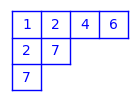

In [53]:
T=random.choice(SSYT)
T.plot()

In [54]:
T.weight() # number of [1s, 2s, 3s, ...] \in Z^r

[1, 2, 0, 1, 0, 1, 2]

In [56]:
SSYT.cardinality()

7350

The Schur polynomial can then be expressed as
$$ s_\lambda(t) = \sum_{T \in \operatorname{SSYT}(\lambda)} t^{\operatorname{wt}(T)}  $$

## Conclusion

We have seen an example of how representation theory and algebraic combinatorics are connected: characters of type A, Schur polynomials and Young tableaux.

In my research I consider other special functions obtained from representations theory and give them a combinatorial description using solvable lattice models describing paths in a two dimensional grid.

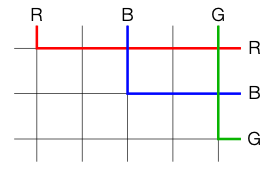

Each configuration is given a weight parametrized by $t$ and summing these weights give the partition function of the lattice model.

We show that such partition functions are equal to special functions in representation theory such as Whittaker functions of (infinite-dimensional) principal series representations of $p$-adic groups where $p$ is a prime number.